# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [ ]:
import numpy as np
import math

def prod_non_zero_diag(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number


    Not vectorized implementation.
    """
    sum=1
    for i in range(min(x.size,x[0].size)):
        if x[i][i]!=0:
            sum*=x[i][i]

    return sum

    pass


def prod_non_zero_diag_vect(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number


    Vectorized implementation.
    """
    return (x.diagonal()+(x.diagonal()==0)).prod()
    pass


import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


data_size = np.array([1,10,100,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
#for i in range(data_size.size):
#    data_size[i]=3**i

import time

time_non_vectorized = np.zeros(data_size.size)
time_vectorized = np.zeros(data_size.size)

enabled=1

for i in range(data_size.size):
    if enabled:
        arr=np.random.random((data_size[i],data_size[i]))
        start = time.perf_counter()
        prod_non_zero_diag(arr)
        end = time.perf_counter()
        time_non_vectorized[i]=end-start

        start1 = time.perf_counter()
        prod_non_zero_diag_vect(arr)
        end1 = time.perf_counter()
        time_vectorized[i]=end1-start1


f, (ax2) = plt.subplots(1, figsize=(13, 5))


ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show() 

#print (prod_non_zero_diag_vect( np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ))

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_5775/2195652427.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


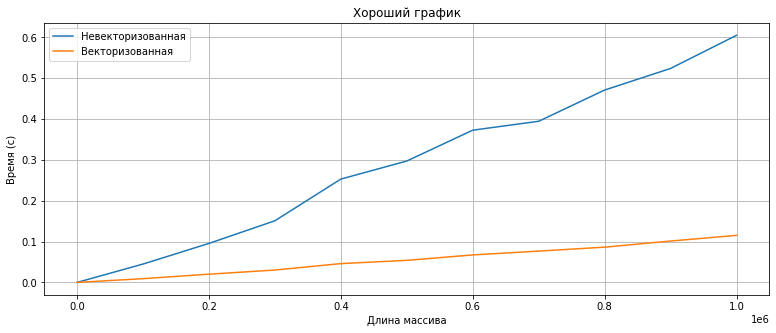

In [1]:
import numpy as np
import math

def are_multisets_equal(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Not vectorized implementation.
    """
    if len(x)!=len(y):
        return False
    x.sort()
    y.sort()
    for i in range(len(x)):
        if x[i]!=y[i]:
            return False
    return True
    pass


def are_multisets_equal_vect(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Not vectorized implementation.
    """
    x.sort()
    y.sort()
    return (x==y).all()
    pass


import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


data_size = np.array([1,10,100,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])
#for i in range(data_size.size):
#    data_size[i]=3**i

import time

time_non_vectorized = np.zeros(data_size.size)
time_vectorized = np.zeros(data_size.size)

enabled=1

for i in range(data_size.size):
    if enabled:
        arr=np.random.random(data_size[i])
        arrl=arr.tolist()
        start = time.perf_counter()
        are_multisets_equal(arrl,arrl)
        end = time.perf_counter()
        time_non_vectorized[i]=end-start

        start1 = time.perf_counter()
        are_multisets_equal_vect(arr,arr)
        end1 = time.perf_counter()
        time_vectorized[i]=end1-start1


f, (ax2) = plt.subplots(1, figsize=(13, 5))


ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show() 

#print(are_multisets_equal_vect(np.array([1, 2, 2, 4]),np.array([4, 2, 1, 2])))

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_2232/658220323.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


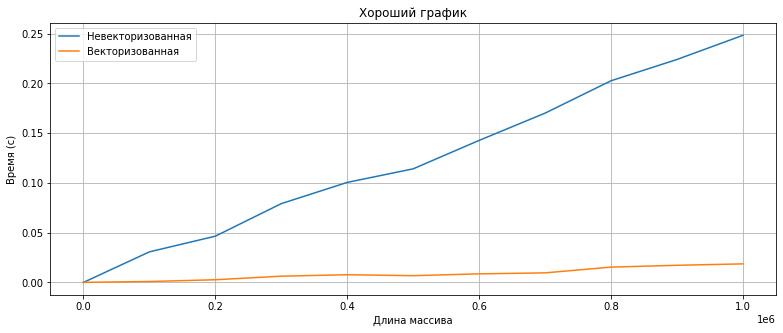

In [152]:
def max_after_zero(x):
    """Find max element after zero in array.

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Not vectorized implementation.
    """
    mx=0
    for i in range(1,x.size):
        if x[i-1]==0:
            mx=max(mx,x[i])
    return mx
    pass

def max_after_zero_vect(x):
    """Find max element after zero in array.

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Vectorized implementation.
    """
    y=np.roll(x,1)
    y[0]=1
    return (x*(y==0)).max()
    pass


import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


data_size = np.array([1,10,100,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])
#for i in range(data_size.size):
#    data_size[i]=3**i

import time

time_non_vectorized = np.zeros(data_size.size)
time_vectorized = np.zeros(data_size.size)

enabled=1

for i in range(data_size.size):
    if enabled:
        arr=np.random.random(data_size[i])
        start = time.perf_counter()
        max_after_zero(arr)
        end = time.perf_counter()
        time_non_vectorized[i]=end-start

        start1 = time.perf_counter()
        max_after_zero_vect(arr)
        end1 = time.perf_counter()
        time_vectorized[i]=end1-start1


f, (ax2) = plt.subplots(1, figsize=(13, 5))


ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show() 


#print(max_after_zero_vect(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])))

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_2232/196605447.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


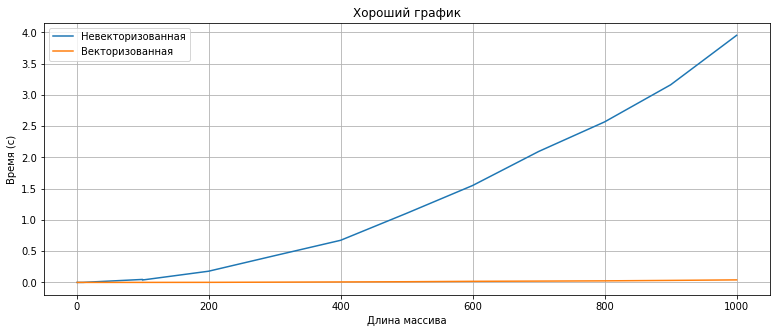

In [156]:
from PIL import Image
import numpy as np


def convert_image(img, coefs):
    """Sum up image channels with weights from coefs array

    input:
    img -- 3-d numpy array (H x W x 3)
    coefs -- 1-d numpy array (length 3)
    output:
    img -- 2-d numpy array

    Not vectorized implementation.
    """
    ans = np.zeros((np.size(img,axis=0),np.size(img,axis=1)))
    for i in range(np.size(img,axis=0)):
        for j in range(np.size(img,axis=1)):
            for k in range(coefs.size):
                ans[i][j]+=img[i][j][k]*coefs[k]
    return ans
    pass



def convert_image_vect(img, coefs):
    return np.sum(img*coefs,axis=2)
    pass





import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


data_size = np.array([1,10,100,100,200,300,400,500,600,700,800,900,1000])
#for i in range(data_size.size):
#    data_size[i]=3**i

import time

time_non_vectorized = np.zeros(data_size.size)
time_vectorized = np.zeros(data_size.size)

enabled=1

for i in range(data_size.size):
    if enabled:
        arr=np.random.random((data_size[i],data_size[i],3))
        start = time.perf_counter()
        convert_image(arr,np.array([0.299, 0.587, 0.114]))
        end = time.perf_counter()
        time_non_vectorized[i]=end-start

        start1 = time.perf_counter()
        convert_image_vect(arr,np.array([0.299, 0.587, 0.114]))
        end1 = time.perf_counter()
        time_vectorized[i]=end1-start1


f, (ax2) = plt.subplots(1, figsize=(13, 5))


ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()




pic = Image.open("img.jpg")
if pic.mode != 'RGB':
    pic = pic.convert('RGB')
pix = convert_image_vect(np.array(pic),np.array([0.299, 0.587, 0.114]))
#print(pix.shape)
pic=Image.fromarray(pix)
if pic.mode != 'RGB':
    pic = pic.convert('RGB')
pic.save('img2.jpg')

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_2232/2387364628.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


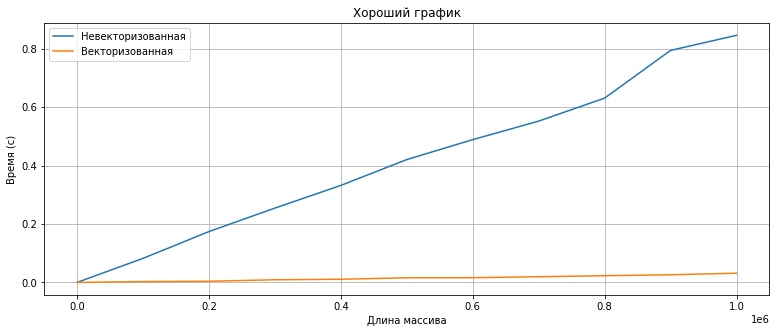

In [112]:
import numpy as np

def run_length_encoding(x):
    """Make run-length encoding.

    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables

    Not vectorized implementation.
    """
    a=0
    kl=0
    nmb=[]
    rep=[]
    for i in range(x.size):
        if i==0 or x[i-1]==x[i]:
            a=x[i]
            kl+=1
        else:
            nmb.append(a)
            rep.append(kl)
            a=x[i]
            kl=1
    nmb.append(a)
    rep.append(kl)
    return (np.array(nmb),np.array(rep))
    pass


def run_length_encoding_vect(x):
    """Make run-length encoding.

    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables

    Vectorized implementation.
    """
    x=np.append(x,-1)
    d=np.diff(x)
    d1=np.where(d!=0)[0]
    return (x[d1],np.concatenate((np.array([d1[0]+1]),np.diff(d1))))
    pass


import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


data_size = np.array([1,10,100,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])
#for i in range(data_size.size):
#    data_size[i]=3**i

import time
import scipy

time_non_vectorized = np.zeros(data_size.size)
time_vectorized = np.zeros(data_size.size)
time_scipy = np.zeros(data_size.size)

enabled=1

for i in range(data_size.size):
    if enabled:
        arr=np.random.random(data_size[i])
        start = time.perf_counter()
        run_length_encoding(arr)
        end = time.perf_counter()
        time_non_vectorized[i]=end-start

        start1 = time.perf_counter()
        run_length_encoding_vect(arr)
        end1 = time.perf_counter()
        time_vectorized[i]=end1-start1


f, (ax2) = plt.subplots(1, figsize=(13, 5))


ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()


#print(run_length_encoding_vect(np.array([2, 2, 2, 3, 3, 3, 5])))

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_2232/536699670.py:96: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


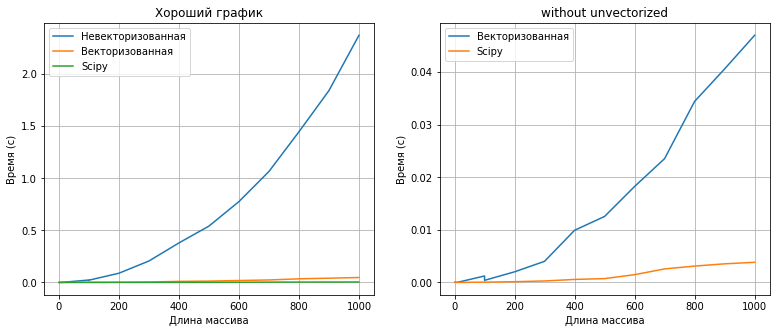

In [151]:
import numpy
import math

def pairwise_distance(x, y):
    """Return pairwise object distance.

    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array

    Not vectorized implementation.
    """
    ans = np.empty((np.size(x,axis=0),np.size(y,axis=0)))
    for i in range(np.size(x,axis=0)):
        for j in range(np.size(y,axis=0)):
            ans[i][j]=math.sqrt((x[i][0]-y[j][0])**2+(x[i][1]-y[j][1])**2)
    return ans
    pass

def pairwise_distance_vect(x, y):
    """Return pairwise object distance.

    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array

    Vectorized implementation.
    """
    return(np.sqrt(np.sum((x[:,None]-y[None,:])**2,axis=2)))
    pass



import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


data_size = np.array([1,10,100,100,200,300,400,500,600,700,800,900,1000])
#for i in range(data_size.size):
#    data_size[i]=3**i

import time
from scipy.spatial.distance import cdist

time_non_vectorized = np.zeros(data_size.size)
time_vectorized = np.zeros(data_size.size)
time_scipy = np.zeros(data_size.size)

enabled=1

for i in range(data_size.size):
    if enabled:
        arr=np.random.random((data_size[i],2))
        arr2=np.random.random((data_size[i],2))
        start = time.perf_counter()
        pairwise_distance(arr,arr2)
        end = time.perf_counter()
        time_non_vectorized[i]=end-start

        start1 = time.perf_counter()
        pairwise_distance_vect(arr,arr2)
        end1 = time.perf_counter()
        time_vectorized[i]=end1-start1

        start2 = time.perf_counter()
        cdist(arr,arr2)
        end2 = time.perf_counter()
        time_scipy[i]=end2-start2


f, (ax2,ax3) = plt.subplots(1,2, figsize=(13, 5))


ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.plot(data_size, time_scipy, label=u"Scipy")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

#ax3.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax3.plot(data_size, time_vectorized, label=u"Векторизованная")
ax3.plot(data_size, time_scipy, label=u"Scipy")
ax3.set_title(u"without unvectorized")
ax3.set_xlabel(u"Длина массива")
ax3.set_ylabel(u"Время (с)")
ax3.grid()
ax3.legend()

f.show()


#print(pairwise_distance_vect(np.array([[0,0],[1,1],[2,2]]),np.array([[1,0],[1,1],[1,2]])))

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

## Разница скорости обычных и векторизованных операций

Рассмотрим скорости работы обычных функций и функций __векторизованных__ с помощью библиотеки _Numpy_ на следующих примерах:
* Проверка на равенство мультимножеств
* Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой
* Вычислить матрицу евклидовых расстояний между объектами.

---

|Задача|Скорость обычной функции|Скорость __векторизованной__ функции|Во сколько раз ускорилось|
|-|-|-|-|
|Мультимножества|0.6 c|0.1 c|6|
|Максимальный элемент|0.25 c.|0.025 c.|10|
|Матрица|2.38 c.|0.048 c.|50|

---

Очевидно, что векторизация позволяет добиться значимого ускорения в работе с данными